#**Data Cleaning Class Task**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

###Task 1: Data Exploration and Assessment

####Task 1.1: Initial Data Inspection

In [3]:
df = pd.read_csv("/content/hotel_bookings.csv")

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (119390, 32)


In [5]:
print("Dataset Types:", df.dtypes)

Dataset Types: hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent              

In [6]:
print("First five rows of the Dataset: ")
df.head()

First five rows of the Dataset: 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
print("Last five rows of the Dataset: ")
df.tail()

Last five rows of the Dataset: 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
print("Statistical Summary:")
print(df.describe(include='all'))

Statistical Summary:
             hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique          

####Task 1.2: Missing Value Analysis

In [9]:
print("Missing Values Summary:")

missing_data = df.isnull().sum()

missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(by='Missing_Count', ascending=False)

print(missing_summary)

Missing Values Summary:
          Missing_Count  Missing_Percentage
company          112593           94.306893
agent             16340           13.686238
country             488            0.408744
children              4            0.003350


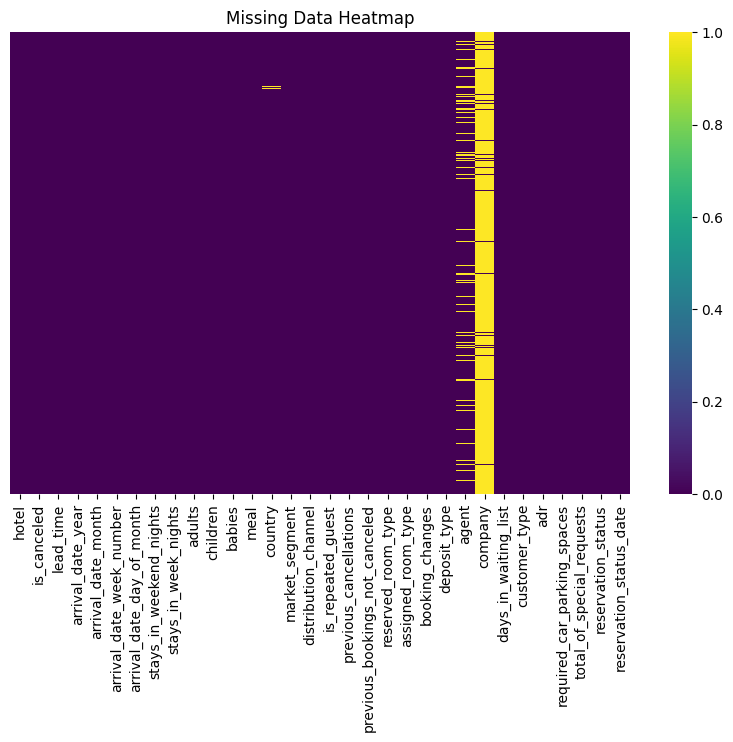

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [11]:
missing_summary['Likely_Category'] = missing_summary.index.map({
    'company': 'MNAR',
    'agent': 'MAR',
    'country': 'MCAR',
    'children': 'MCAR'
})

print("Missing Value Report:")
print(missing_summary)

Missing Value Report:
          Missing_Count  Missing_Percentage Likely_Category
company          112593           94.306893            MNAR
agent             16340           13.686238             MAR
country             488            0.408744            MCAR
children              4            0.003350            MCAR


####Task 1.3: Data Quality Assessment

In [12]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

Number of duplicate records: 31994


In [13]:
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                  'adults', 'children', 'babies', 'adr']

print("\nNumerical Columns Summary:")
print(df[numerical_cols].describe())



Numerical Columns Summary:
           lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count  119390.000000            119390.000000         119390.000000   
mean      104.011416                 0.927599              2.500302   
std       106.863097                 0.998613              1.908286   
min         0.000000                 0.000000              0.000000   
25%        18.000000                 0.000000              1.000000   
50%        69.000000                 1.000000              2.000000   
75%       160.000000                 2.000000              3.000000   
max       737.000000                19.000000             50.000000   

              adults       children         babies            adr  
count  119390.000000  119386.000000  119390.000000  119390.000000  
mean        1.856403       0.103890       0.007949     101.831122  
std         0.579261       0.398561       0.097436      50.535790  
min         0.000000       0.000000       0.000000      -6.3

In [14]:
print("\nCategorical Data Analysis:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col} - Unique Values ({df[col].nunique()}):")
    value_counts = df[col].value_counts()
    print(value_counts)

    unique_values = df[col].dropna().unique()
    print(f"  Potential issues: {[val for val in unique_values if ' ' in str(val) or str(val) != str(val).strip()]}")



Categorical Data Analysis:

hotel - Unique Values (2):
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
  Potential issues: ['Resort Hotel', 'City Hotel']

arrival_date_month - Unique Values (12):
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
  Potential issues: []

meal - Unique Values (5):
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
  Potential issues: []

country - Unique Values (177):
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64
  Potential issues: []

market_segment - Unique Values (8):
market_segment
Online

In [15]:
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']
print(f"\nRows with 0 total guests: {df[df['total_guests'] == 0].shape[0]}")


Rows with 0 total guests: 180


In [16]:
print(f"\nRows with negative ADR values: {df[df['adr'] < 0].shape[0]}")


Rows with negative ADR values: 1


###Task 2: Data Cleaning Implementation

####Task 2.1: Handling Missing Values

In [17]:
# Handle missing values in 'children'
print("Before imputation - children missing:", df['children'].isnull().sum())
df['children'] = df['children'].fillna(0)
print("After imputation - children missing:", df['children'].isnull().sum())

Before imputation - children missing: 4
After imputation - children missing: 0


In [18]:
# Investigate missing patterns in 'country'
print("Before imputation - country missing:", df['country'].isnull().sum())
print("Most common country:", df['country'].mode()[0])

# Impute missing values in 'country' with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])
print("After imputation - country missing:", df['country'].isnull().sum())

Before imputation - country missing: 488
Most common country: PRT
After imputation - country missing: 0


In [19]:
print("Before imputation - agent missing:", df['agent'].isnull().sum())
df['agent'] = df['agent'].fillna(0)
print("After imputation - agent missing:", df['agent'].isnull().sum())

Before imputation - agent missing: 16340
After imputation - agent missing: 0


In [20]:
print("Before imputation - company missing:", df['company'].isnull().sum())
df['company'] = df['company'].fillna(0)
print("After imputation - company missing:", df['company'].isnull().sum())

Before imputation - company missing: 112593
After imputation - company missing: 0


In [21]:
group_median = df.groupby(['hotel', 'customer_type'])['children'].median()

def impute_children(row):
    if pd.isna(row['children']):
        return group_median.get((row['hotel'], row['customer_type']), 0)
    else:
        return row['children']

df['children'] = df.apply(impute_children, axis=1)

####Task 2.2: Duplicate Detection and Removal

In [22]:
# Check for exact duplicates
duplicates = df.duplicated()
print(f"Number of exact duplicates: {duplicates.sum()}")

Number of exact duplicates: 32013


In [23]:
df[duplicates].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07,2.0
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07,2.0
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01,2.0
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08,1.0


In [24]:
duplicates_removed = duplicates.sum()

In [25]:
df = df.drop_duplicates()
print("Duplicates removed. New dataset shape:", df.shape)
print(f"Number of duplicate rows removed: {duplicates_removed}")

Duplicates removed. New dataset shape: (87377, 33)
Number of duplicate rows removed: 32013


In [26]:
# Check near-duplicates based on selected key columns
subset_cols = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
               'lead_time', 'adults', 'children', 'babies']

near_duplicates = df.duplicated(subset=subset_cols)
print(f"Potential near-duplicates based on key columns: {near_duplicates.sum()}")

Potential near-duplicates based on key columns: 23287


####Task 2.3: Outlier Detection and Treatment

In [27]:
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                  'adults', 'children', 'babies', 'adr']

# IQR-based outlier detection
print("\nIQR Outlier Detection:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")



IQR Outlier Detection:
lead_time: 2396 outliers
stays_in_weekend_nights: 220 outliers
stays_in_week_nights: 1531 outliers
adults: 22887 outliers
children: 8364 outliers
babies: 914 outliers
adr: 2488 outliers


In [28]:
from scipy.stats import zscore

# Z-score outlier detection (threshold = 3)
print("\nZ-Score Outlier Detection (|z| > 3):")
z_scores = df[numerical_cols].apply(zscore)

for col in numerical_cols:
    outliers = df[(z_scores[col].abs() > 3)]
    print(f"{col}: {len(outliers)} outliers")


Z-Score Outlier Detection (|z| > 3):
lead_time: 1049 outliers
stays_in_weekend_nights: 290 outliers
stays_in_week_nights: 1531 outliers
adults: 76 outliers
children: 3669 outliers
babies: 914 outliers
adr: 626 outliers


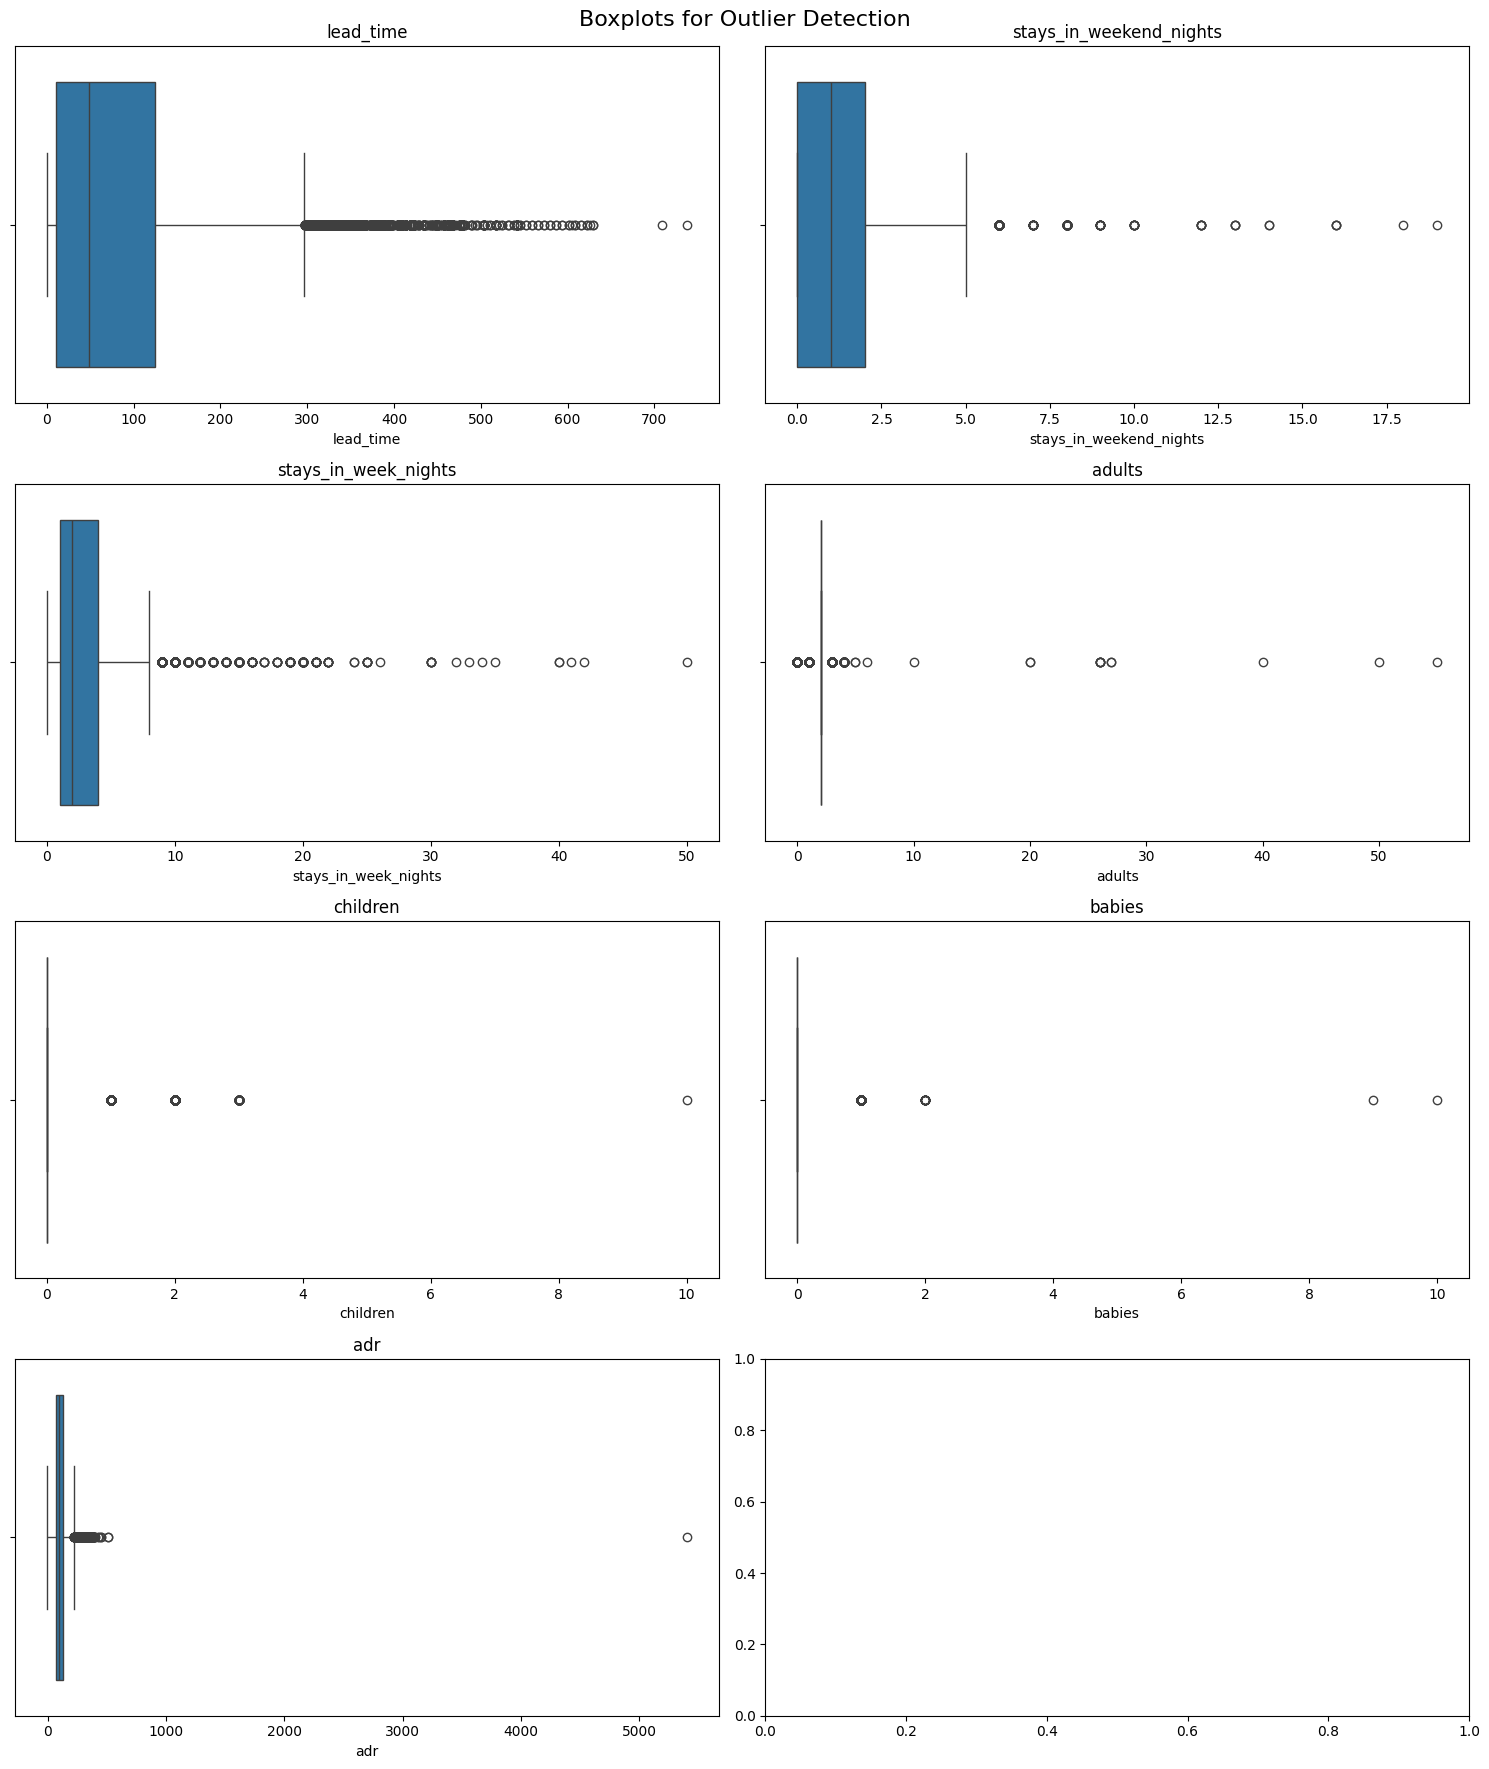

In [29]:
#Boxplot Visualization
fig, axes = plt.subplots(4, 2, figsize=(15, 18))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16)

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_pos = i % 2
    sns.boxplot(x=df[col], ax=axes[row][col_pos])
    axes[row][col_pos].set_title(col)

plt.tight_layout()
plt.show()


In [30]:
# Remove extreme ADR outliers
print("Before removal - rows with ADR > 5000:", df[df['adr'] > 5000].shape[0])
df = df[df['adr'] <= 5000]
print("After removal - dataset shape:", df.shape)

Before removal - rows with ADR > 5000: 1
After removal - dataset shape: (87376, 33)


####Task 2.4: Data Inconsistency Fixes

In [31]:
columns_to_fix = ['country', 'meal', 'market_segment', 'distribution_channel',
                  'customer_type', 'deposit_type', 'assigned_room_type', 'reservation_status']

for col in columns_to_fix:
    df[col] = df[col].astype(str).str.strip().str.title()

In [32]:
df['country'] = df['country'].str.strip().str.upper()
df['assigned_room_type'] = df['assigned_room_type'].str.strip().str.upper()
df['reserved_room_type'] = df['reserved_room_type'].str.strip().str.upper()
df['meal'] = df['meal'].str.strip().str.upper()

In [33]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'] + '-' +
                                     df['arrival_date_day_of_month'].astype(str),
                                     format='%Y-%B-%d')

In [34]:
# Remove rows where adults, children, and babies are all 0
invalid_guests = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]
print(f"Rows with 0 guests: {invalid_guests.shape[0]}")

# Drop those rows
df = df.drop(invalid_guests.index)
print("After removing invalid guest rows:", df.shape)

Rows with 0 guests: 166
After removing invalid guest rows: (87210, 34)


In [36]:
# Remove rows with negative values in key columns
cols = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
for col in cols:
    print(f"{col} - Negative values: {df[df[col] < 0].shape[0]}")


df = df[(df['lead_time'] >= 0) &
        (df['adr'] >= 0) &
        (df['stays_in_weekend_nights'] >= 0) &
        (df['stays_in_week_nights'] >= 0) &
        (df['adults'] >= 0) &
        (df['children'] >= 0) &
        (df['babies'] >= 0)]
print("After removing rows with negative values:", df.shape)

lead_time - Negative values: 0
adr - Negative values: 0
stays_in_weekend_nights - Negative values: 0
stays_in_week_nights - Negative values: 0
adults - Negative values: 0
children - Negative values: 0
babies - Negative values: 0
After removing rows with negative values: (87209, 34)


In [37]:
# Remove bookings with 0 nights that were not canceled
zero_stay = df[(df['stays_in_weekend_nights'] == 0) &
               (df['stays_in_week_nights'] == 0) &
               (df['is_canceled'] == 0)]
print("Bookings with 0 nights and not canceled:", zero_stay.shape[0])

df = df[~((df['stays_in_weekend_nights'] == 0) &
          (df['stays_in_week_nights'] == 0) &
          (df['is_canceled'] == 0))]
print("After removing Bookings with 0 nights and not canceled rows:", df.shape)

Bookings with 0 nights and not canceled: 568
After removing Bookings with 0 nights and not canceled rows: (86641, 34)


In [38]:
# Remove rows where ADR is 0 for active bookings
adr_zero_invalid = df[(df['adr'] == 0) & (df['is_canceled'] == 0)]
print("ADR = 0 for active bookings:", adr_zero_invalid.shape[0])

df = df[~((df['adr'] == 0) & (df['is_canceled'] == 0))]
print("After removing rows with ADR 0 for active bookings:", df.shape)

ADR = 0 for active bookings: 906
After removing rows with ADR 0 for active bookings: (85735, 34)


In [39]:
print("Final dataset shape after removing illogical rows:", df.shape)

Final dataset shape after removing illogical rows: (85735, 34)


###Task 3: Data Validation and Documentation

####Task 3.1: Data Integrity Checks

In [40]:
# Check that total guests > 0
df['total_guests'] = df['adults'] + df['children'] + df['babies']
invalid_guests = df[df['total_guests'] <= 0]
print("Rows with total guests <= 0:", invalid_guests.shape[0])

Rows with total guests <= 0: 0


In [41]:
#Check that arrival dates are within expected range
print("Arrival date range:")
print("Min:", df['arrival_date'].min())
print("Max:", df['arrival_date'].max())

Arrival date range:
Min: 2015-07-01 00:00:00
Max: 2017-08-31 00:00:00


Based on the dataset description, hotel bookings span from **July 2015 to August 2017**.

In [42]:
# Validate that numerical values are within reasonable ranges
print("\nRange checks:")
print("Adults max:", df['adults'].max())
print("Children max:", df['children'].max())
print("Babies max:", df['babies'].max())
print("ADR max:", df['adr'].max())
print("Lead Time max:", df['lead_time'].max())


Range checks:
Adults max: 55
Children max: 10.0
Babies max: 10
ADR max: 510.0
Lead Time max: 709


In [43]:
# Ensure categorical values are from expected sets
for col in ['meal', 'market_segment', 'customer_type', 'deposit_type', 'reservation_status']:
    print(f"{col} unique values:", df[col].unique())

meal unique values: ['BB' 'FB' 'HB' 'SC' 'UNDEFINED']
market_segment unique values: ['Direct' 'Corporate' 'Online Ta' 'Offline Ta/To' 'Groups' 'Complementary'
 'Undefined' 'Aviation']
customer_type unique values: ['Transient' 'Contract' 'Transient-Party' 'Group']
deposit_type unique values: ['No Deposit' 'Refundable' 'Non Refund']
reservation_status unique values: ['Check-Out' 'Canceled' 'No-Show']


####Task 3.3: Final Dataset Preparation

In [44]:
final_df = df.copy()

In [45]:
# Export to CSV
final_df.to_csv('hotel_bookings_cleaned.csv', index=False)
print("Cleaned dataset saved as 'hotel_bookings_cleaned.csv'")

Cleaned dataset saved as 'hotel_bookings_cleaned.csv'


#Data Dictionary – hotel_bookings_cleaned.csv

| Column Name              | Description                                                         | Type        |
|--------------------------|----------------------------------------------------------------------|-------------|
| hotel                    | Hotel type (Resort Hotel or City Hotel)                             | Categorical |
| is_canceled              | Whether the booking was canceled (1) or not (0)                      | Binary      |
| lead_time                | Number of days between booking and arrival                           | Numerical   |
| arrival_date             | Combined datetime of arrival (created from year, month, day)         | Date        |
| stays_in_weekend_nights | Number of weekend nights stayed                                      | Numerical   |
| stays_in_week_nights     | Number of weekday nights stayed                                      | Numerical   |
| adults                   | Number of adults                                                     | Numerical   |
| children                 | Number of children                                                   | Numerical   |
| babies                   | Number of babies                                                     | Numerical   |
| meal                     | Meal package selected (BB, HB, FB, SC, UNDEFINED)                    | Categorical |
| country                  | Country of origin (ISO code)                                         | Categorical |
| market_segment           | Booking source (e.g., Online TA, Corporate)                          | Categorical |
| distribution_channel     | How booking info was transmitted                                     | Categorical |
| is_repeated_guest        | Whether the guest has booked before                                  | Binary      |
| previous_cancellations   | Number of previous cancellations                                     | Numerical   |
| reserved_room_type       | Room type initially reserved                                         | Categorical |
| assigned_room_type       | Room type actually assigned                                          | Categorical |
| booking_changes          | Number of changes to the booking                                     | Numerical   |
| deposit_type             | Type of deposit made                                                 | Categorical |
| agent                    | ID of travel agent                                                   | Numerical   |
| company                  | ID of company                                                        | Numerical   |
| days_in_waiting_list     | Number of days booking was on waiting list                           | Numerical   |
| customer_type            | Type of customer (e.g., Transient, Group)                            | Categorical |
| adr                      | Average Daily Rate                                                   | Numerical   |
| required_car_parking_spaces | Number of parking spaces requested                              | Numerical   |
| total_of_special_requests| Number of special requests                                           | Numerical   |
| reservation_status       | Final status (Check-Out, Canceled, No-Show)                          | Categorical |
| reservation_status_date  | Date of last status update                                           | Date        |
| total_guests             | Calculated total guests (adults + children + babies)                 | Numerical   |
